# PROYECTO FINAL

Para este proyecto final de seleccionar el modelo para el conjunto de datos de cáncer de mama, primero empezamos importando las librerías que vamos a requerir para este ejercicio

In [1]:
#Preprocesamiento
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

#Clasificadores y métricas de rendimiento
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

Luego importamos la data para comenzar con nuestro análisis

In [2]:
dataset=pd.read_csv('C:\ProyectoFinal\\wdbc.data')

Contamos las filas y columnas de nuestro dataset

In [3]:
dataset.shape

(569, 32)

Posteriormente leemos 10 registros de nuestro dataset 

In [4]:
dataset.head(10)

,Id,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


Borramos la columna Id que es irrelevante para nuestro estudio

In [5]:
dataset.drop(['Id'], axis = 1, inplace = True)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    object 
 1   Radius_Mean              569 non-null    float64
 2   Texture_Mean             569 non-null    float64
 3   Perimeter_Mean           569 non-null    float64
 4   Area_Mean                569 non-null    float64
 5   Smoothness_Mean          569 non-null    float64
 6   Compactness_Mean         569 non-null    float64
 7   Concavity_Mean           569 non-null    float64
 8   Concave_Points_Mean      569 non-null    float64
 9   Symmetry_Mean            569 non-null    float64
 10  Fractal_Dimension_Mean   569 non-null    float64
 11  Radius_Se                569 non-null    float64
 12  Texture_Se               569 non-null    float64
 13  Perimeter_Se             569 non-null    float64
 14  Area_Se                  5

In [7]:
dataset.describe()

,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,Symmetry_Mean,Fractal_Dimension_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
dataset.columns

Index(['Diagnosis', 'Radius_Mean', 'Texture_Mean', 'Perimeter_Mean',
       'Area_Mean', 'Smoothness_Mean', 'Compactness_Mean', 'Concavity_Mean',
       'Concave_Points_Mean', 'Symmetry_Mean', 'Fractal_Dimension_Mean',
       'Radius_Se', 'Texture_Se', 'Perimeter_Se', 'Area_Se', 'Smoothness_Se',
       'Compactness_Se', 'Concavity_Se', 'Concave_Points_Se', 'Symmetry_Se',
       'Fractal_Dimension_Se', 'Radius_Worst', 'Texture_Worst',
       'Perimeter_Worst', 'Area_Worst', 'Smoothness_Worst',
       'Compactness_Worst', 'Concavity_Worst', 'Concave_Points_Worst',
       'Symmetry_Worst', 'Fractal_Dimension_Worst'],
      dtype='object')

Dividimos el conjunto de datos en conjuntos de datos independientes y dependientes para una exploración más optimizada

In [9]:
X = dataset.drop('Diagnosis', axis = 1)
Y = dataset['Diagnosis']

Utilizamos las gráficas de violin ya que son una gran herramienta para representar distribuciones de datos numéricos. Combinan 
características de diagrama de caja y diagramas de densidad de núcleo. Aquí, usaremos gráficos de violín para comparar las 
distribuciones de variables en condiciones benignas y malignas.

In [10]:
def violinplot(data_norm, data_diag, start_idx, stop_idx):
    data = pd.concat([data_diag,data_norm.iloc[:,start_idx:stop_idx]],axis=1)
    data = pd.melt(data,id_vars="Diagnosis",
                        var_name="features",
                        value_name='value')
    sns.violinplot(x="features", y="value", hue="Diagnosis", data=data,split=True, inner="quart")
    plt.xticks(rotation=90)
    plt.show()

In [11]:
# Prepararamos los datos para la visualización de gráficos de violín
data_diag = Y
data = X
data_norm = (data - data.mean()) / (data.std())    

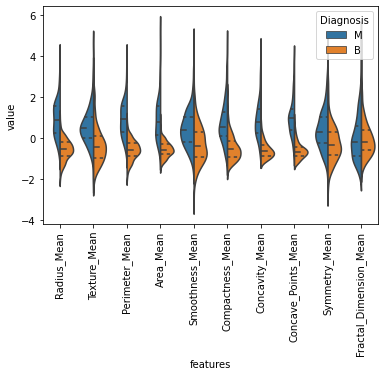

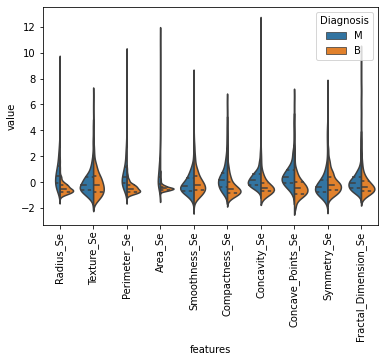

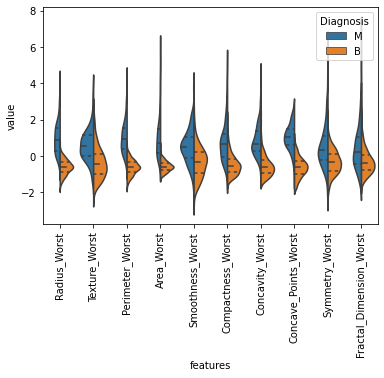

In [12]:
violinplot(data_norm, data_diag, 0, 10)
violinplot(data_norm, data_diag, 10, 20)
violinplot(data_norm, data_diag, 20, 30)

Las gráficas anteriores nos muestran qué variables tienen distribuciones distintas bajo condiciones M y B, por lo que podemos confiar en tales variables para la clasificación. Por ejemplo, radius_se

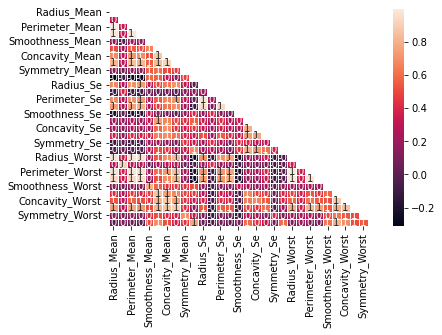

In [13]:
# Correlaciones
corr = X.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".0f")
plt.show()

Podemos ver claramente que varias columnas están muy altamente correlacionadas, causando multicolinealidad entre variables independientes, por lo que necesitamos eliminar las características altamente correlacionadas en los pasos de preprocesamiento.

### PREPROCESAMIENTO DE DATOS

Para que un algoritmo de aprendizaje automático funcione con sus datos, es importante que todos los valores estén entrerd en forma numérica. Primero necesitamos explorar los tipos de datos presentes en nuestro conjunto de datos. Un codificador de etiquetas convierte las etiquetas legibles por humanos en numéricas. En nuestro caso, las entradas 'M' y 'B' se convertirían en 1 y 0 respectivamente.

In [14]:
dataset.dtypes

Diagnosis                   object
Radius_Mean                float64
Texture_Mean               float64
Perimeter_Mean             float64
Area_Mean                  float64
Smoothness_Mean            float64
Compactness_Mean           float64
Concavity_Mean             float64
Concave_Points_Mean        float64
Symmetry_Mean              float64
Fractal_Dimension_Mean     float64
Radius_Se                  float64
Texture_Se                 float64
Perimeter_Se               float64
Area_Se                    float64
Smoothness_Se              float64
Compactness_Se             float64
Concavity_Se               float64
Concave_Points_Se          float64
Symmetry_Se                float64
Fractal_Dimension_Se       float64
Radius_Worst               float64
Texture_Worst              float64
Perimeter_Worst            float64
Area_Worst                 float64
Smoothness_Worst           float64
Compactness_Worst          float64
Concavity_Worst            float64
Concave_Points_Worst

In [15]:
dataset['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

In [16]:
labelencoder = LabelEncoder()

In [17]:
dataset['Diagnosis'] = labelencoder.fit_transform(dataset['Diagnosis'].values)

In [18]:
dataset.head()

,Diagnosis,Radius_Mean,Texture_Mean,Perimeter_Mean,Area_Mean,Smoothness_Mean,Compactness_Mean,Concavity_Mean,Concave_Points_Mean,Symmetry_Mean,...,Radius_Worst,Texture_Worst,Perimeter_Worst,Area_Worst,Smoothness_Worst,Compactness_Worst,Concavity_Worst,Concave_Points_Worst,Symmetry_Worst,Fractal_Dimension_Worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


A continuación, eliminamos características altamente correlacionadas

Dividimos los datos preprocesados en variables independientes y dependientes para su posterior procesamiento.

In [19]:
X = dataset.drop('Diagnosis', axis = 1)
Y = dataset['Diagnosis']

In [20]:
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [21]:
# Eliminamos características altamente correlacionadas

corr_matrix = X.corr().abs() 

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)
to_drop = [x for x in tri_df.columns if any(tri_df[x] > 0.90)]
dataset = dataset.drop(to_drop, axis = 1)

print(f"The reduced dataframe has {dataset.shape[1]} columns.")

The reduced dataframe has 21 columns.


Como siguiente paso a nuestro estudio,eliminamos los valores nulos restantes

In [22]:
X.dropna(axis=1, inplace=True)

In [23]:
X.isna().sum()

Radius_Mean                0
Texture_Mean               0
Perimeter_Mean             0
Area_Mean                  0
Smoothness_Mean            0
Compactness_Mean           0
Concavity_Mean             0
Concave_Points_Mean        0
Symmetry_Mean              0
Fractal_Dimension_Mean     0
Radius_Se                  0
Texture_Se                 0
Perimeter_Se               0
Area_Se                    0
Smoothness_Se              0
Compactness_Se             0
Concavity_Se               0
Concave_Points_Se          0
Symmetry_Se                0
Fractal_Dimension_Se       0
Radius_Worst               0
Texture_Worst              0
Perimeter_Worst            0
Area_Worst                 0
Smoothness_Worst           0
Compactness_Worst          0
Concavity_Worst            0
Concave_Points_Worst       0
Symmetry_Worst             0
Fractal_Dimension_Worst    0
dtype: int64

### CONJUNTO DE DATOS DIVIDIDO

Dividimos el conjunto de datos en entrenamiento (75%) y pruebas (25%)

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.25)

Necesitamos llevar nuestros valores de características dentro de un rango comparable, manteniendo al mismo tiempo su independencia. Para ello utilizaremos el método fit_transform en el conjunto de datos de entrenamiento. Este método aprende sobre nuestros datos (media y varianza) y luego utiliza esta información para transformar los datos en un rango de varianza unitaria de media cero.

In [25]:
# Escalamos los datos para que estén dentro de un cierto rango
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # método de ajuste: aprende sobre los datos, transform: usa (x-mean)/sd para transformar los datos en un rango de varianza 1 de media cero
X_test = sc.transform(X_test) # use la media y la desviación estándar obtenidas en el paso anterior

In [26]:
# Construimos un clasificador de regresión logística
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [27]:
Y_predictions = classifier.predict(X_test)

In [28]:
Y_predictions

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0])

Como siguiente paso, elegimos un modelo de aprendizaje automático

Elegimos el modelo de aprendizaje automático de acuerdo con el problema que estamos tratando de resolver. Dado que nuestros datos ya están etiquetados (malignos / benignos), utilizaremos el enfoque de aprendizaje supervisado. Dos tipos diferentes de problemas en el aprendizaje supervisado son la clasificación y la regresión. Dado que nuestro objetivo es categorizar los datos en malignos o benignos, estamos tratando con un problema de clasificación.
Aquí, utilizaremos un modelo de regresión logística.

## LOGISTIC REGRESSION

Procederemos a construir el modelo de regresión logística

[[92  0]
 [ 2 49]]
0.986013986013986 %


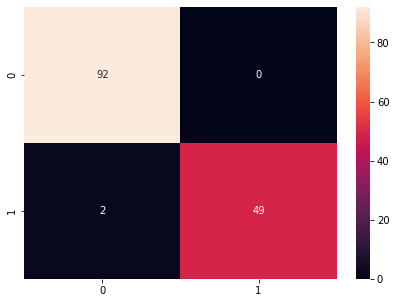

In [29]:
# Realizamos la matriz de confusión y calculamos la puntuación de precisión

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model = LogisticRegression()

#Fit the model
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)


mylist = []
# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
# accuracy score
acc_logreg = accuracy_score(Y_test, y_pred)

plt.figure(figsize=(7,5))
cm = confusion_matrix(Y_test, Y_predictions)
sns.heatmap(cm, annot=True)

mylist.append(acc_logreg)
print(cm)
print(acc_logreg,'%')

## KNN

Procederemos a construir el modelo de KNN

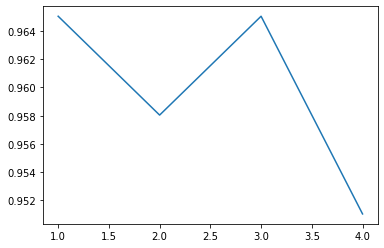

In [30]:
# Encontramos el número óptimo de vecinos

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

list1 = []
for neighbors in range(1,5):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(Y_test,y_pred))
plt.plot(list(range(1,5)), list1)
plt.show()

 Realizamos el entrenamiento del clasificador K del vecino más cercano en el conjunto de entrenamiento

In [31]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, Y_train)

# Predicting the Test set results

y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0]


In [32]:
# Realizamos la matriz de confusión y calculamos la puntuación de precisión
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
acc_knn = accuracy_score(Y_test, y_pred)
mylist.append(acc_knn)
print(cm)
print(acc_knn)

[[91  1]
 [ 4 47]]
0.965034965034965


## RANDOM FOREST CLASSIFCATION

Procederemos a construir el modelo de ramdom forest classification

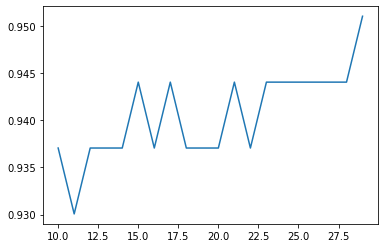

In [33]:
# Encontramos el número óptimo de n_estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(10,30):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(Y_test,y_pred))
#print(mylist)
plt.plot(list(range(10,30)), list1)
plt.show()

In [34]:
#Entrenamiento del clasificador RandomForest en el conjunto de entrenamiento
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 15, criterion='entropy', random_state=0)
classifier.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=15, random_state=0)

In [35]:
# Predicción de los resultados del conjunto de pruebas
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0]


In [36]:
# Hacemos la matriz de confusión y calculamos la puntuación de precisión
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
acc_randomforest = accuracy_score(Y_test, y_pred)
mylist.append(acc_randomforest)
print(cm)
print(acc_randomforest)

[[89  3]
 [ 5 46]]
0.9440559440559441


## DECISIONTREECLASSIFIER

Procederemos a construir el modelo de DecisionTreeClassifier

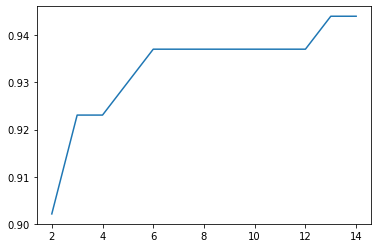

In [37]:
# Encontramos el número óptimo de max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,15):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(Y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,15)), list1)
plt.show()

In [38]:
# Entrenamiento del clasificador del árbol de decisión en el conjunto de entrenamiento
classifier = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=0, criterion='entropy')
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=0)

In [39]:
# Predicción de los resultados del conjunto de pruebas
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1
 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0]


In [40]:
# Realizamos la matriz de confusión y calculamos la puntuación de precisión
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
acc_decisiontree = accuracy_score(Y_test, y_pred)
print(cm)
print(acc_decisiontree)
mylist.append(acc_decisiontree)

[[88  4]
 [ 6 45]]
0.9300699300699301


## Support Vector Machines

Procederemos a construir el modelo de support vector machines

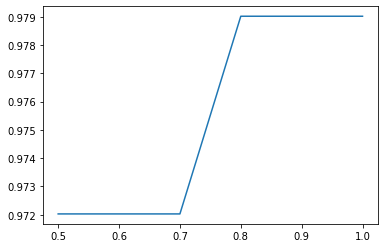

In [41]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for c in [0.5,0.6,0.7,0.8,0.9,1.0]:
    classifier = SVC(C = c, random_state=0, kernel = 'rbf')
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    list1.append(accuracy_score(Y_test,y_pred))
plt.plot([0.5,0.6,0.7,0.8,0.9,1.0], list1)
plt.show()

In [42]:
# Entrenamiento del clasificador de vectores de soporte en el conjunto de entrenamiento
from sklearn.svm import SVC
classifier = SVC(C = 0.9, random_state=0, kernel = 'rbf')
classifier.fit(X_train, Y_train)

SVC(C=0.9, random_state=0)

In [43]:
# Predicción de los resultados del conjunto de pruebas
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0
 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0]


In [44]:
# Realizamos la matriz de confusión y calculamos la puntuación de precisión
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, y_pred)
acc_svc = accuracy_score(Y_test, y_pred)
print(cm)
print(acc_svc,'%')
mylist.append(acc_svc)

[[92  0]
 [ 3 48]]
0.9790209790209791 %


**Y finalmente mostramos el siguiente cuadro con los Modelos que realizamos con su correspondiente puntuación**

In [45]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest',   
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_decisiontree
              ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,0.986014
0,Support Vector Machines,0.979021
1,KNN,0.965035
3,Random Forest,0.944056
4,Decision Tree,0.930070


**Y un cuadro del % de precisión vs los modelos clasificadores**

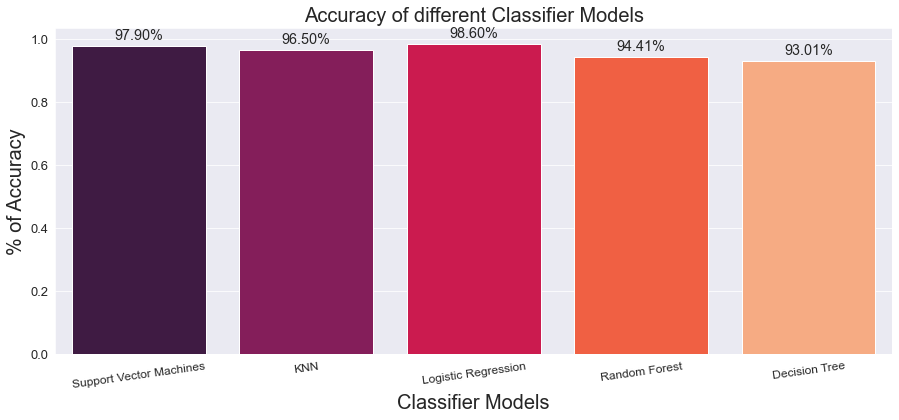

In [46]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=models.Model, y=models.Score, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

**Partiendo de los datos obtendos, podemos observar que el mejor modelo por el que podemos decidirnos, es el de Regresión Logística, ya que tiene el porcentaje más alto de precisión y el modelo de Decisión Tree, tiene el porcentaje más bajo de precisión.**